<a href="https://www.kaggle.com/code/arnayb/evaluating-factors-when-making-a-college-decision?scriptVersionId=197115345" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/kaggle/input/unidata/University data - Sheet1.csv")


## **Introduction**
As a current college student who recently navigated through the college admissions process, I was curious in exploring the various factors that influence student preferences for universities. In this case study, we will analyze a dataset from the 2012-2013 admissions cycle, examining key metrics including acceptance rates, enrollment rates, tuition cost. Through this, we aim to discover the motivations behind student selections.


## Displaying the data


In [2]:
df

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.5685,34.78337,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.8092,33.50223,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.1740,32.36261,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.6384,34.72282,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.2957,32.36432,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,451671,University of South Florida-Sarasota-Manatee,2013,34243-2049,Master's degree,Manatee County,-82.5630,27.39177,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN
1530,454184,The Kingâ€™s College,2013,10004,Bachelor's degree,New York County,-74.0123,40.70686,Interdenominational,Implied no,...,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0
1531,454582,Ottawa University-Online,2013,66067,Master's degree,Franklin County,-95.2638,38.60269,American Baptist,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20863.0
1532,455770,Providence Christian College,2013,91104,Bachelor's degree,Los Angeles County,-118.1180,34.17275,Undenominational,Implied no,...,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0,NaN,350.0


In [3]:
#print data statistics
df.describe()

,ID number,year,Longitude location of institution,Latitude location of institution,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
count,1534.000000,1534.0,1534.000000,1534.000000,1377.000000,1377.000000,1377.000000,1257.000000,1259.000000,1169.000000,...,1492.00000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,516.000000,9.600000e+02
mean,189091.037810,2013.0,-88.342340,38.729994,6391.193174,3554.880174,1043.046478,53.927605,53.085782,470.340462,...,41.47185,40.764075,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619,9459.463178,6.503032e+04
std,58641.915456,0.0,14.838802,4.832832,8787.469171,4309.457606,1285.165519,34.385164,31.658662,68.368390,...,18.88068,18.560557,14.091423,21.897744,29.463324,19.143070,19.337354,7.706674,19398.443224,1.773784e+05
min,100654.000000,2013.0,-158.062000,19.701850,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,4.200000e+01
25%,153148.500000,2013.0,-94.576300,35.348345,1488.000000,950.000000,287.000000,16.000000,26.000000,430.000000,...,28.00000,27.000000,6.000000,18.000000,48.000000,54.000000,53.000000,2.000000,2080.000000,8.391000e+03
50%,186508.000000,2013.0,-84.514250,39.946095,3350.000000,2056.000000,538.000000,65.000000,49.000000,460.000000,...,40.00000,39.000000,12.000000,34.000000,78.000000,68.000000,67.000000,6.000000,4283.000000,1.870400e+04
75%,215730.000000,2013.0,-77.207175,41.984927,7016.000000,4203.000000,1246.000000,86.000000,87.000000,500.000000,...,51.25000,51.000000,20.250000,50.000000,98.000000,79.000000,78.000000,11.000000,8715.500000,4.505250e+04
max,456490.000000,2013.0,-67.456500,64.857050,72676.000000,35815.000000,10241.000000,100.000000,100.000000,720.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,213079.000000,2.505435e+06


## Data-cleaning and Formatting: Removing missing or invalid data

In [4]:
#Redefine the dataset to contain only the columns that will be useful for our goal
updated_columns =['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [5]:
df

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.5685,34.78337,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.8092,33.50223,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.1740,32.36261,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.6384,34.72282,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.2957,32.36432,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,451671,University of South Florida-Sarasota-Manatee,2013,34243-2049,Master's degree,Manatee County,-82.5630,27.39177,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN
1530,454184,The Kingâ€™s College,2013,10004,Bachelor's degree,New York County,-74.0123,40.70686,Interdenominational,Implied no,...,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0
1531,454582,Ottawa University-Online,2013,66067,Master's degree,Franklin County,-95.2638,38.60269,American Baptist,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20863.0
1532,455770,Providence Christian College,2013,91104,Bachelor's degree,Los Angeles County,-118.1180,34.17275,Undenominational,Implied no,...,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0,NaN,350.0


Created variables to represent the acceptance and enrollment rates

In [6]:
df["acceptance rate"] = (df["Admissions total"]/df["Applicants total"] * 100).round(decimals=2)
df["enrollment rate"] = (df["Enrolled total"]/df["Admissions total"]  * 100).round(decimals=2)

In [7]:
# Check for missing values
print(df.isnull().sum())

ID number                                                   0
Name                                                        0
year                                                        0
ZIP code                                                    0
Highest degree offered                                      0
                                                         ... 
Percent of freshmen receiving other loan aid               42
Endowment assets (year end) per FTE enrollment (GASB)    1018
Endowment assets (year end) per FTE enrollment (FASB)     574
acceptance rate                                           158
enrollment rate                                           158
Length: 147, dtype: int64


In [8]:
mean_aid = df['Percent of freshmen receiving other loan aid'].mean()
df['Percent of freshmen receiving other loan aid'] = df['Percent of freshmen receiving other loan aid'].fillna(mean_aid)
mean_height = df['Endowment assets (year end) per FTE enrollment (GASB)'].mean()
df['Endowment assets (year end) per FTE enrollment (GASB)'] = df['Endowment assets (year end) per FTE enrollment (GASB)'].fillna(mean_height)
mean_FASB = df['Endowment assets (year end) per FTE enrollment (FASB)'].mean()
df['Endowment assets (year end) per FTE enrollment (FASB)'] = df['Endowment assets (year end) per FTE enrollment (FASB)'].fillna(mean_FASB)

mean_acceptance = df['acceptance rate'].mean()
df['acceptance rate'] = df['acceptance rate'].fillna(mean_acceptance)
mean_tuition = df['Tuition and fees, 2013-14'].mean()
df['Tuition and fees, 2013-14'] = df['Tuition and fees, 2013-14'].fillna(mean_tuition)
mean_enrollment = df['enrollment rate'].mean()
df['enrollment rate'] = df['enrollment rate'].fillna(mean_enrollment)


print(df.isnull().sum())

ID number                                                0
Name                                                     0
year                                                     0
ZIP code                                                 0
Highest degree offered                                   0
                                                        ..
Percent of freshmen receiving other loan aid             0
Endowment assets (year end) per FTE enrollment (GASB)    0
Endowment assets (year end) per FTE enrollment (FASB)    0
acceptance rate                                          0
enrollment rate                                          0
Length: 147, dtype: int64


## Visualizing the dataset

In [9]:
#Top 15 universites recieving the most applications
popular_schools = df[['Name','Applicants total']].sort_values("Applicants total",ascending = False).head(15)
popular_schools

,Name,Applicants total
84,University of California-Los Angeles,72676.0
81,University of California-Berkeley,61717.0
86,University of California-San Diego,60832.0
841,New York University,57845.0
83,University of California-Irvine,56515.0
87,University of California-Santa Barbara,55258.0
77,California State University-Long Beach,55019.0
863,St John's University-New York,51634.0
126,San Diego State University,51163.0
82,University of California-Davis,49820.0


Text(0.5, 0, '# of applications')

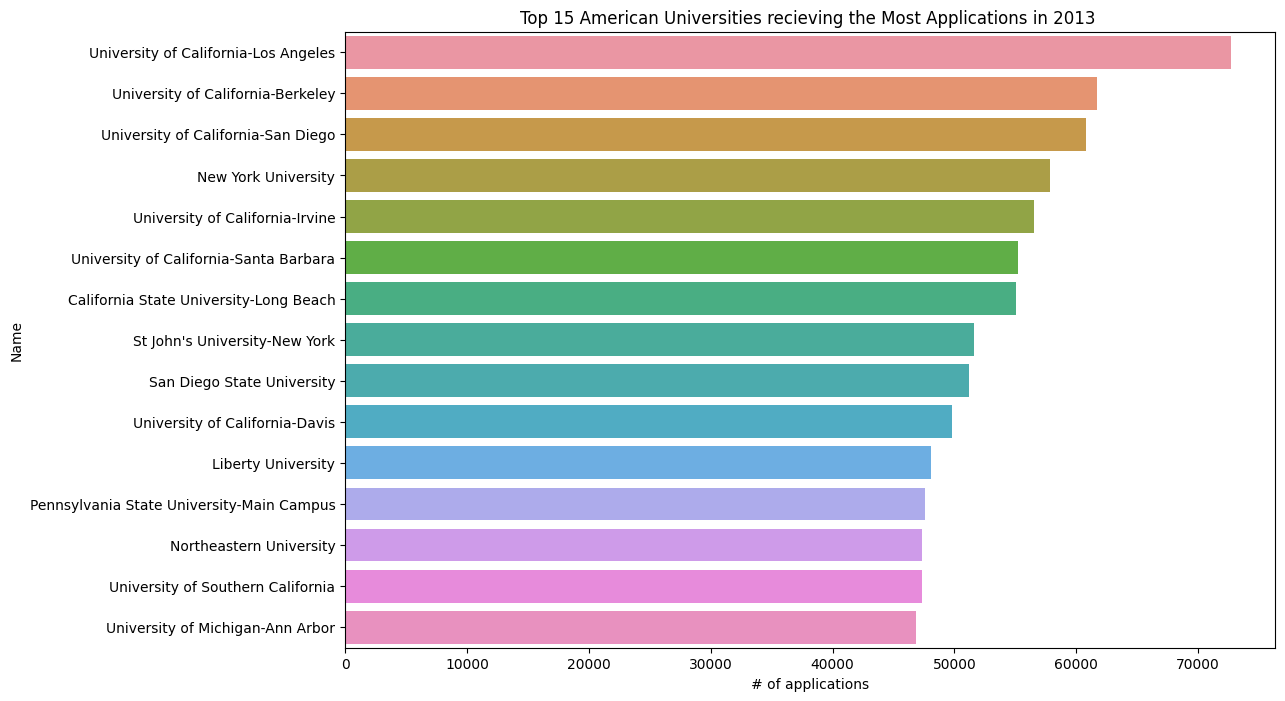

In [10]:
plt.figure(figsize=(12,8))
sns.barplot(x='Applicants total',y='Name',data = popular_schools )
plt.title('Top 15 American Universities recieving the Most Applications in 2013 ')
plt.xlabel('# of applications')

**The data above shows the top universities recieving the most applications(undergrad). One may assume that a student may be more inclined to attend a university with more total applications, as it signifies the school's popularity. However, many students, including myself, applied to many different universities. At the end of the day, you can only choose one. Interestingly, six of the schools in the top fifteen are University of California Schools. One possible explanation to this is that all nine of the University of California schools utilize the same application. Thus, many students often apply to all the UC schools out of convinience and ease, since they don't have to submit additional materials when applying to each one.**



# Analyze


## Relationship between acceptance rate and student preference

**Are students more drawn towards college with a lower acceptance rate?**

In [11]:
df.drop(["Percent admitted - total","Admissions yield - total"], axis=1, inplace=True)

In [12]:
df.describe()

,ID number,year,Longitude location of institution,Latitude location of institution,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,...,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB),acceptance rate,enrollment rate
count,1534.000000,1534.0,1534.000000,1534.000000,1377.000000,1377.000000,1377.000000,1257.000000,1259.000000,1169.000000,...,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1534.000000,1534.000000,1.534000e+03,1534.000000,1534.000000
mean,189091.037810,2013.0,-88.342340,38.729994,6391.193174,3554.880174,1043.046478,53.927605,53.085782,470.340462,...,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619,9459.463178,6.503032e+04,64.570094,33.062471
std,58641.915456,0.0,14.838802,4.832832,8787.469171,4309.457606,1285.165519,34.385164,31.658662,68.368390,...,14.091423,21.897744,29.463324,19.143070,19.337354,7.600370,11243.445398,1.402940e+05,17.719222,14.196472
min,100654.000000,2013.0,-158.062000,19.701850,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,4.200000e+01,5.690000,5.890000
25%,153148.500000,2013.0,-94.576300,35.348345,1488.000000,950.000000,287.000000,16.000000,26.000000,430.000000,...,6.000000,18.000000,48.000000,54.000000,53.000000,3.000000,8483.250000,1.319700e+04,55.670000,23.075000
50%,186508.000000,2013.0,-84.514250,39.946095,3350.000000,2056.000000,538.000000,65.000000,49.000000,460.000000,...,12.000000,34.000000,78.000000,68.000000,67.000000,6.000000,9459.463178,5.597150e+04,64.570094,32.325000
75%,215730.000000,2013.0,-77.207175,41.984927,7016.000000,4203.000000,1246.000000,86.000000,87.000000,500.000000,...,20.250000,50.000000,98.000000,79.000000,78.000000,10.750000,9459.463178,6.503032e+04,76.177500,39.185000
max,456490.000000,2013.0,-67.456500,64.857050,72676.000000,35815.000000,10241.000000,100.000000,100.000000,720.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,213079.000000,2.505435e+06,100.000000,100.000000


correlation between enrollment rate and acceptance rate= -0.07165986641549467


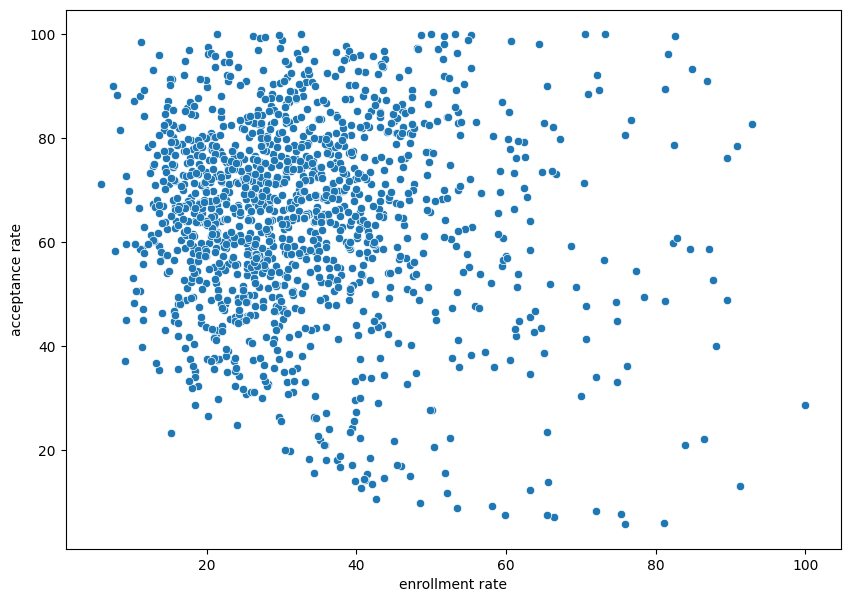

In [13]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= df['enrollment rate'], y=df['acceptance rate'])
print(f"correlation between enrollment rate and acceptance rate= {df['enrollment rate'].corr(df['acceptance rate'])}")

**Conclusion:** The scatterplot aboves shows a moderately negative correlation between acceptance rate and enrollment rate. In other words, the higher the acceptance rate of a college is, the more likely a student is to enroll. Thus, using this data, we can make the conclusion that **students are more inclined to attend universities with a lower acceptance rate.** From a student's perspective, this conclusion makes sense. Lower acceptance rates are generally associated with higher prestige.

Next, I decided to explore whether there is a student preference between public or private universities.

## Relationship b/n student preference and type of institution(private or public)

Text(0, 0.5, 'Average Number of Applicants')

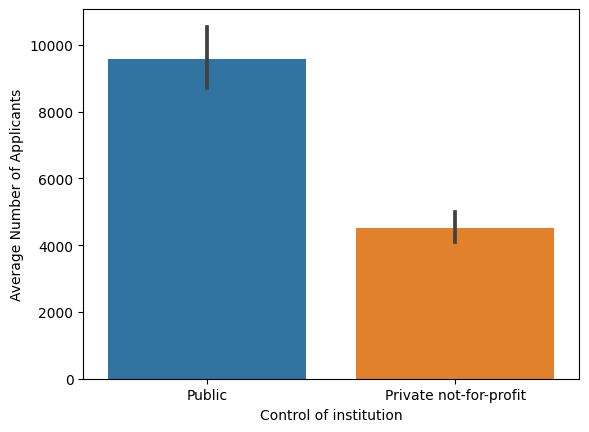

In [14]:

sns.barplot(x='Control of institution', y='Applicants total', data=df)

plt.ylabel("Average Number of Applicants")


correlation between enrollment rate and acceptance rate= -0.07165986641549467


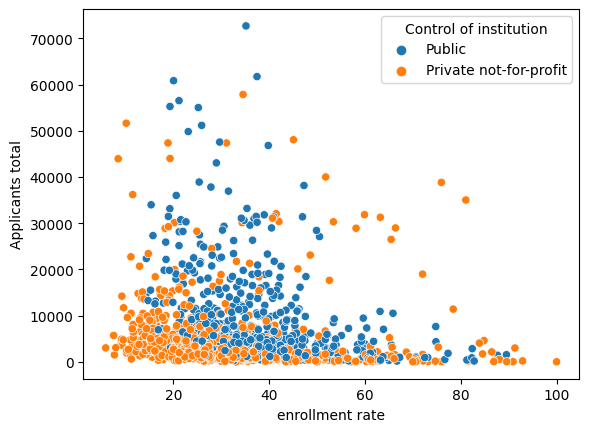

In [15]:
g = sns.scatterplot(x=df['enrollment rate'],y=df['Applicants total'],hue=df['Control of institution'])

print(f"correlation between enrollment rate and acceptance rate= {df['enrollment rate'].corr(df['acceptance rate'])}")



In [16]:
df.groupby(['Control of institution'])[['Applicants total','enrollment rate']].mean()

,Applicants total,enrollment rate
Control of institution,,
Private not-for-profit,4525.052934,30.445720
Public,9583.468504,37.575552


**Conclusions:** 
1. Looking at the box plots, we can clearly see that more students on average apply to public universites over private universities. It is important to note, however, that many of these colleges are different in their application process. The ease of a college's application process also plays a role as to how many students end up applying.
2. The enrollment rate for public universities is approximately 8 percent higher than private universities.
Using the data, we can can conclude that there is a slight student preference towards public universities over private universities. 
       

## Relationship between uni tuition and student preference

**Are students more drawn to students with a lower tuition fee?**

# of applicants and tuition and fees = -0.031059932701399656

enrollment rate and tuition and fees = -0.3430521470842516



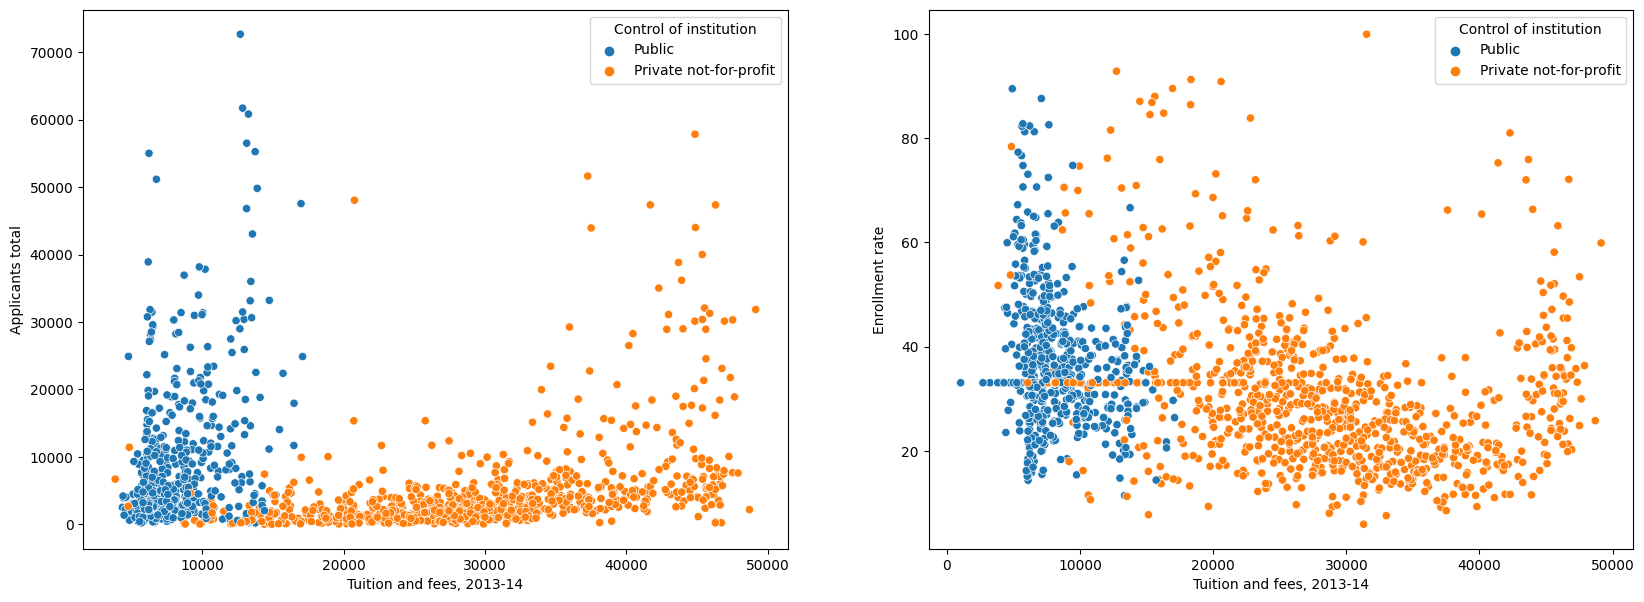

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.scatterplot(x= df['Tuition and fees, 2013-14'], y=df['Applicants total'], ax= axes[0], hue= df['Control of institution'])
axes[0].set_ylabel("Applicants total")

sns.scatterplot(x= df['Tuition and fees, 2013-14'], y=df['enrollment rate'], ax= axes[1], hue= df['Control of institution'])
axes[1].set_ylabel("Enrollment rate")

print(f"# of applicants and tuition and fees = {df['Tuition and fees, 2013-14'].corr(df['Applicants total'])}\n")
print(f"enrollment rate and tuition and fees = {df['Tuition and fees, 2013-14'].corr(df['enrollment rate'])}\n")

**Conclusions**
Based on the scatterplots, there is not a clear correlation between tuition and number of applications. In addition, there is also not a clear correlation b/n tuition and enrollment rate. Therefore, there is not sufficient evidence to conclude a relationship between a student's preference for a college and its tuition.

# Inferences and Future Exploration

1. Due to the fairly strong correlation between enrollment rate and university acceptance rate, we can conclude that students are generally drawn to universities with a lower acceptance rate. Generally, a university's acceptance rate is associated with prestige, so this conclusion makes sense.
2. There is a slight student preference for public universities over private universities. Public universities, especially a student's state school, are generally cheaper in tuition compared to private universities.
**Future Exploration**
* I would like to explore whether university demographics is a factor contributing to a student's university preference.